Considere dois métodos A e B, onde desejamos comparar os seus desempenhos.

In [1]:
#dado sintético 
set.seed(1)
trials <- 30
MethodA <- rnorm(trials, mean=10, sd = 2)
MethodB <- rexp(trials, rate = 1/10)

,MethodA,MethodB
,<dbl>,<dbl>
1,8.747092,2.035104
2,10.367287,10.227259
3,8.328743,3.017409
4,13.190562,7.252143
5,10.659016,7.515427
6,8.359063,2.350275


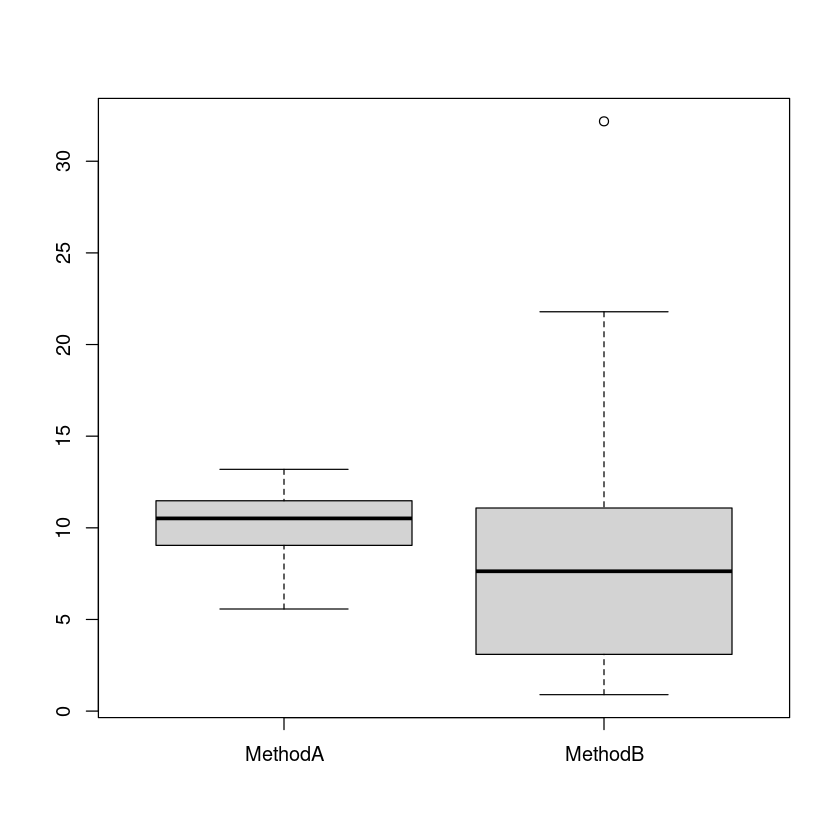

In [2]:
data <- data.frame(MethodA, MethodB)
head(data)
boxplot(data)

Realizando teste de normalidade usando Shapiro-Wilk

Hipotese nula: não há evidência que a distribuição não seja normal (p-value >= 0.05)

Hipotese alternativa: a distribuição não é normal (p-value < 0.05)

In [3]:
shapiro.test(MethodA)


	Shapiro-Wilk normality test

data:  MethodA
W = 0.95011, p-value = 0.1703


In [4]:
shapiro.test(MethodB)


	Shapiro-Wilk normality test

data:  MethodB
W = 0.86506, p-value = 0.001303


Realizando um segundo teste de usando Anderson-Darling

In [5]:
library(nortest)

In [6]:
ad.test(MethodA)


	Anderson-Darling normality test

data:  MethodA
A = 0.48213, p-value = 0.2142


In [7]:
ad.test(MethodB)


	Anderson-Darling normality test

data:  MethodB
A = 1.0281, p-value = 0.008948


Uma vez não sendo normal, deve-se aplicar o wilcox test.

A hipótese nula é que não evidência de diferença entre A e B (p-value >= 0.05)

A hipótese alternativa há diferença entre A e B (p-value < 0.05)


Novamente há duas situações. 

Situação #1: A primeira é quando se quer comparar a média de A e B. Neste caso a comparação é das amostras. 

In [8]:
res <- wilcox.test(MethodA, MethodB, paired=FALSE, exact=FALSE)
res


	Wilcoxon rank sum test with continuity correction

data:  MethodA and MethodB
W = 580, p-value = 0.05555
alternative hypothesis: true location shift is not equal to 0


Situação #2: Se quer comparar se as medidas individuais de A e B. Neste caso a comparação é pareada. 

In [9]:
res <- t.test(MethodA, MethodB, paired=TRUE)
res


	Paired t-test

data:  MethodA and MethodB
t = 0.976, df = 29, p-value = 0.3371
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -1.303921  3.684384
sample estimates:
mean difference 
       1.190231 


Execute este mesmo experimento com menos tentativas (trials) (5, 10)